In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [17]:
# load data
def file_name(number):
    return f"resources/data/exp{number}.csv"

data1_table = np.genfromtxt(file_name(1), delimiter=',', skip_header=1)
data1 = {
    "harmonic": data1_table[:,0],   #harmonic number
    "freq": data1_table[:,1],       # frequency, Hz
    "half freq": data1_table[:,2],  # half-frequency, Hz
}

data2_table = np.genfromtxt(file_name(2), delimiter=',', skip_header=1)
data2 = {
    "harmonic": data2_table[:,0],   #harmonic number
    "mass": data2_table[:,1],       # mass (g)
    "half mass": data2_table[:,2],  # half-mass (g)
}

data3_table = np.genfromtxt(file_name(3), delimiter=',', skip_header=1)
data3 = {
    "harmonic": data3_table[:,0],   #harmonic number
    "length": data3_table[:,1],       # length (cm)
    "half length": data3_table[:,2],  # half-length (cm)
}

# Lab Tier 2 Standing Waves


# Part 1

- Graph the measured resonant frequency vs the harmonic number 𝑛 and perform a fit to the data using equation (5)
- Make sure your graph includes error bar
- Plot the normalized residuals. Are the points randomly distributed?
- What is your measured linear mass density of the string, μexp, including the error associated with it? Do an agreement
test with the theoretical value μth and explain
- Calculate the reduced chi-squared, 𝜒̃ ^2, and comment on the goodness of fit

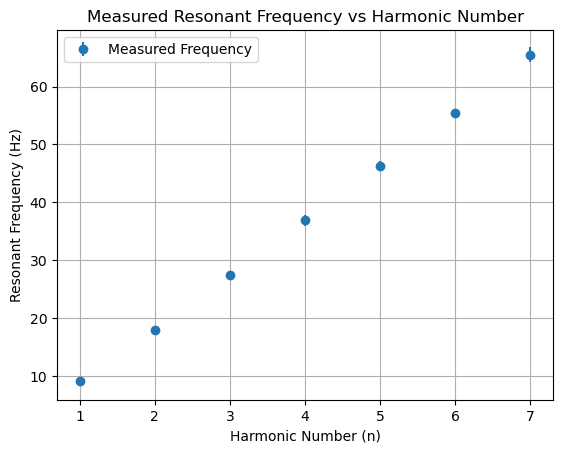

In [30]:
def part1():
    harmonic = data1_table[:, 0]
    freq = data1_table[:, 1]
    half_freq = data1_table[:, 2]

    uncertainty = np.abs(freq - half_freq)

    plt.errorbar(harmonic, freq, yerr=uncertainty, fmt='o', label='Measured Frequency')
    plt.title('Measured Resonant Frequency vs Harmonic Number')
    plt.xlabel('Harmonic Number (n)')
    plt.ylabel('Resonant Frequency (Hz)')
    plt.grid(True)
    plt.legend()
    plt.show()
part1()

# Part 2

[0.01394495]


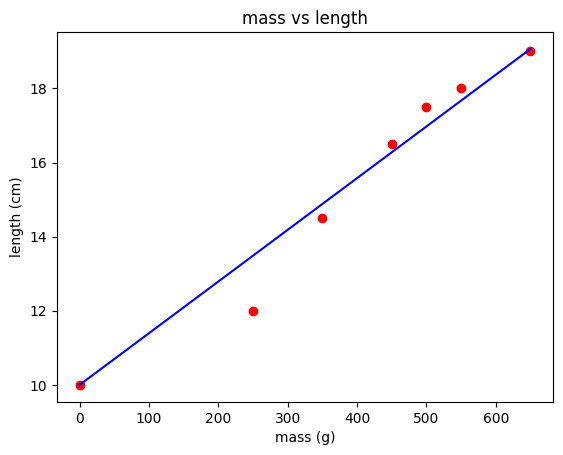

In [3]:
def mu_business():
    mass = [0,
            250,
            350,
            450,
            500,
            550,
            650,
            ] # grams
    length = [10,
              12,
              14.5,
              16.5,
              17.5,
              18,
              19,
              ]# cm
    length_zero = 10
    
    #fit the data to a line
    def line(x, m):
        return m * x + length_zero
    fit, _ = opt.curve_fit(line, mass, length)
    print(fit)
    
    #plot the line
    plt.plot(mass, length, 'ro')
    plt.plot(mass, line(np.array(mass), fit[0]), 'b-')
    plt.xlabel('mass (g)')
    plt.ylabel('length (cm)')
    plt.title('mass vs length')
    plt.show()
    
    #return the slope of the line
    return fit[0]
    
stretch = mu_business()

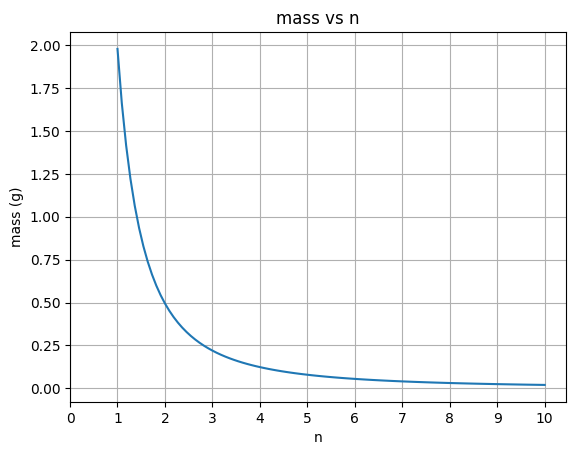

In [25]:
# formula: n = 2fL * sqrt(mu/T)
# T = mass * 9.8
# mu_stretched = mu / ((mass * stretch + 10) / 10)
# given: f = 30, L = 1.1, mu = 4.45e-3
# solve for mass as a function of n using mu_stretched
f = 30
L = 1.1
mu = 4.45e-3
g = 9.8
k = 5000 / stretch

def graphMass():
    n = np.linspace(1, 10, 100)
    def h(n):
        return 4 * mu * f**2 * L**2 / (g * n**2)
    mass = np.sqrt(k**2 + 2 * k * h(n)) - k
    plt.plot(n, mass)
    plt.xticks(np.arange(0, 11, 1))
    plt.grid()
    plt.xlabel('n')
    plt.ylabel('mass (g)')
    plt.title('mass vs n')
    plt.show()
graphMass()

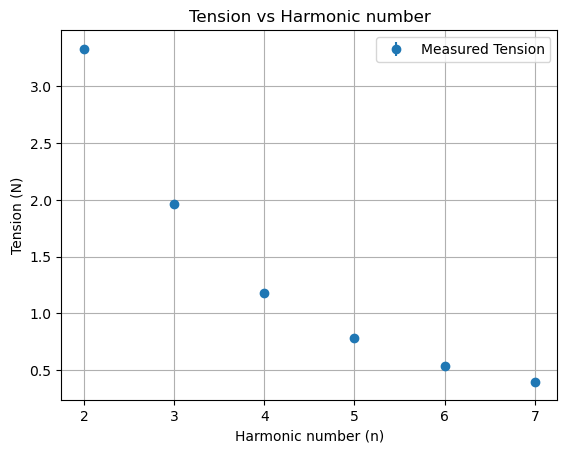

In [33]:
def part2():
    g = 9.8
    harmonic = data2_table[:, 0]
    mass_kg = data2_table[:, 1] / 1000
    half_mass_kg = data2_table[:, 2] / 1000
    tension = mass_kg * g

    uncertainty = np.abs(mass_kg - half_mass_kg)

    # Plotting
    plt.errorbar(harmonic, tension, yerr=uncertainty, fmt='o', label='Measured Tension')
    plt.xlabel('Harmonic number (n)')
    plt.ylabel('Tension (N)')
    plt.title('Tension vs Harmonic number')
    plt.grid(True)
    plt.legend()
    plt.show()
part2()

# Part 3

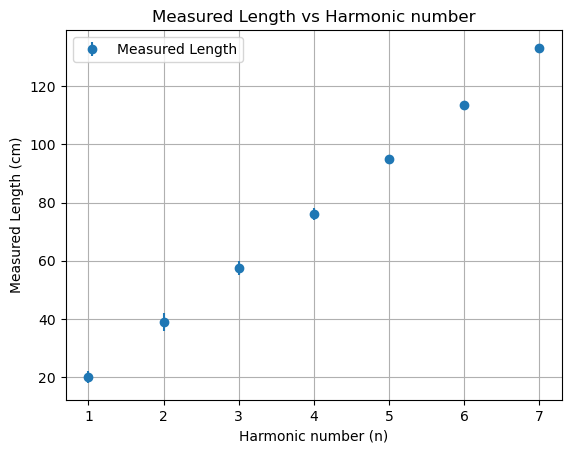

In [34]:
def part3():
    harmonic = data3_table[:, 0]
    length = data3_table[:, 1]
    half_length = data3_table[:, 2]

    uncertainty = np.abs(length - half_length)

    plt.errorbar(harmonic, length, yerr=uncertainty, fmt='o', label='Measured Length')
    plt.xlabel('Harmonic number (n)')
    plt.ylabel('Measured Length (cm)')
    plt.title('Measured Length vs Harmonic number')
    plt.legend()
    plt.grid(True)
    plt.show()
part3()